# **Project: Customer Churn Prediction**

---


## Motivation and Objective
The project's goal is to build a classifier for customer churn. Customer churn is an important metric that the company wants to track. It will assist them in determining whether the product improves customer tenure and calculating customer lifetime values in order to determine whether the product is financially healthy. In addition, the company would occasionally run customer retention campaigns targeted at customers with high churn probabilities.


---
## Instructions for Code Running and Environment Setup
The following code and comments are pretty self-explanatory in Colab with the required pakcages:




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings

Mounted at /content/gdrive


---

## Data Loading
The data is from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv). The data set includes 7043 customers, 20 columns for customer profiles, and 1 outcome variable indicating whether or not customers churn.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Fall 2022/CptS 437 Intro to machine learning/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset contains",df.shape[0],"customers and",df.shape[1],"columns")
print("\n")
print("Dataset contains the following columns:")
print(df.dtypes)

Dataset contains 7043 customers and 21 columns


Dataset contains the following columns:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object




---



## Data Preparation

The preparation process involves the following steps:
1. Remove any columns that are irrelevant to the customer churn, such as customerID
2. Clean data types
3. Check for missing data and, if any, impute it
4. Use LabelEncoder in sklearn to transform the categorical columns into numerical
5. Feature scaling
6. Use ExtraTreesClassifier in sklearn to select the top 10 most important features to include in the model. This reduces the possibility of overfitting and improves model computational time
7. Split data into 80% training, and 20% test. Training data will be used to train the classifiers, and the remaining 20% test dataset will be used to report the model accuracy
8. Check the distribution of outcome variables in the training set and deal with any class imbalances, such as oversampling the minority class using SMOTE


In [ ]:
# 1. Remove irrelevant columns

df = df.drop(columns="customerID")
print("After dropping 'customerID', the new dataset contains",df.shape[0],"customers and",df.shape[1],"columns")

After dropping 'customerID', the new dataset contains 7043 customers and 20 columns


In [ ]:
# 2. Clean data types.
# categorical: gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection
#              , TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn
# numerical: tenure, MonthlyCharges, TotalCharges

for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService'
            , 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
            , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
            , 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    df[col] = df[col].astype('category')

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("The data types after cleaning are:")
print(df.dtypes)

The data types after cleaning are:
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [ ]:
# 3. Missing data imputation

print(df.isnull().sum())
print("\n")
print("Based on the results, there are 11 missing values for 'TotalCharges'. We can simply delete these 11 records.")
df = df.dropna()
print("After dropping the rows with missing values, the new dataset contains",df.shape[0],"customers and",df.shape[1],"columns")

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Based on the results, there are 11 missing values for 'TotalCharges'. We can simply delete these 11 records.
After dropping the rows with missing values, the new dataset contains 7032 customers and 20 columns


In [ ]:
# 4. Data transformation

le = preprocessing.LabelEncoder()

for col in df.columns:
  df[col] = le.fit_transform(df[col])

print("The data types after label encoding are:")
print(df.dtypes)

The data types after label encoding are:
gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object


In [ ]:
# 5. Feature scaling

X = df.iloc[:,0:19]
y = df["Churn"]

sc = StandardScaler()
sc.fit(X)
normalized_X = sc.transform(X)

X = pd.DataFrame(normalized_X, columns = X.columns)

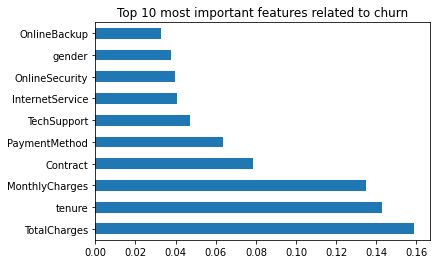

In [ ]:
# 6. Feature selection

classifier = ExtraTreesClassifier(random_state = 111)
classifier.fit(X, y)
# feature importance visualization
feature_importance = pd.Series(classifier.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 most important features related to churn")
plt.show()

X_reduced = X[feature_importance.nlargest(10).index]

In [ ]:
# 7. Split data into 80% training, 20% test

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, train_size=0.8, random_state=111)

print("X_train has", X_train.shape[0], "instances and", X_train.shape[1], "features")
print("X_test has", X_test.shape[0], "instances and", X_test.shape[1], "features")

print("y_train has", y_train.shape[0], "instances")
print("y_test has", y_test.shape[0], "instances")

X_train has 5625 instances and 10 features
X_test has 1407 instances and 10 features
y_train has 5625 instances
y_test has 1407 instances


In [ ]:
# 8. Deal with class imbalance

print("Outcome variable in the training has the following distribution:")
count = y_train.value_counts()
frequency = y_train.value_counts(normalize=True)
print(pd.concat([count,frequency], axis=1, keys=['counts', '%']))

print("\n Because we have fewer churn classes, we can oversample the churn class using SMOTE, which is better at dealing with overfitting than random oversampling.")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print("\n After oversampling, the outcome variable in the training has the new distribution as follows, which is more balanced:")
count = y_train.value_counts()
frequency = y_train.value_counts(normalize=True)
print(pd.concat([count,frequency], axis=1, keys=['counts', '%']))

Outcome variable in the training has the following distribution:
   counts         %
0    4148  0.737422
1    1477  0.262578

 Because we have fewer churn classes, we can oversample the churn class using SMOTE, which is better at dealing with overfitting than random oversampling.

 After oversampling, the outcome variable in the training has the new distribution as follows, which is more balanced:
   counts    %
0    4148  0.5
1    4148  0.5




---


## Classifer Training
This project focuses on experimenting with two classifiers: decision tree and two-layer neural network.





---



### Classifer Comparison
Accuracy and f1-score are used to compare the performance of classifiers

In [ ]:
def DTmodel_eval(clf):
    print('Training Accuracy: %.3f' % accuracy_score(y_train, clf.predict(X_train)))
    print('Test Accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))
    print("\n")
    print('Training F1 Score: %.3f' % f1_score(y_train, clf.predict(X_train)))
    print('Test F1 Score: %.3f' % f1_score(y_test, clf.predict(X_test)))

def NNmodel_eval(clf):
    print('Training Accuracy: %.3f' % accuracy_score(y_train, TwoLayerNetworkPredict(clf, X_train)))
    print('Test Accuracy: %.3f' % accuracy_score(y_test, TwoLayerNetworkPredict(clf, X_test)))
    print("\n")
    print('Training F1 Score: %.3f' % f1_score(y_train, TwoLayerNetworkPredict(clf, X_train)))
    print('Test F1 Score: %.3f' % f1_score(y_test, TwoLayerNetworkPredict(clf, X_test)))

---



### 1. Decision Tree

For decision tree, *DecisionTreeClassifier* in sklearn is simply adopted to train the model, with *GridSearchCV* in sklearn used to tune the following  hyperparameters:
* max_depth (max. depth of the tree)
* min_samples_leaf (min. number of samples required at each leaf node)
* criterion ("gini" or "entropy" used to measure the quality of split)


In [ ]:
# without hyperparameters tuning
DT_simple = DecisionTreeClassifier(random_state = 111, max_depth = 1, min_samples_leaf = 50, criterion = "entropy")
DT_simple.fit(X_train, y_train)

print("Decison tree classifier without any hyperparameters tuning has the prediction performance as follows:")
DTmodel_eval(DT_simple)

Decison tree classifier without any hyperparameters tuning has the prediction performance as follows:
Training Accuracy: 0.738
Test Accuracy: 0.662


Training F1 Score: 0.776
Test F1 Score: 0.595


In [ ]:
# with parameter tuning

params = {
    'max_depth': [None, 1, 2, 3, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15, 20, 30, 40, 50],
    'criterion': ["gini", "entropy"]
    }

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid = params,
                           cv = 5,
                           n_jobs = -1,
                           scoring = "f1")
grid_search.fit(X_train, y_train)

print("The tuned decision tree classifier:", grid_search.best_estimator_)
print("\n")
DT_tuned = grid_search.best_estimator_
print("Decison tree classifier after hyperparameters tuning has the prediction performance as follows:")
DTmodel_eval(DT_tuned)

The tuned decision tree classifier: DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)


Decison tree classifier after hyperparameters tuning has the prediction performance as follows:
Training Accuracy: 0.850
Test Accuracy: 0.743


Training F1 Score: 0.856
Test F1 Score: 0.607




---


### 2. Two-layer Neural Network
For two-layer neural network, the algorithm is coded from scratch. The following hyperparameters are included in the model:
* number of hiddden nodes
* number of epochs
* learning rate
* activation function choice

The best set of hyperparameters is also determined based on the best f1-score obtained on the training dataset.

In [ ]:
# input: activation function name, value
# output[0]: activation function; output[1]: derivative of activation function
def activation_function(activation, a):
  if activation == "tanh":
    t = np.tanh(a)
    dt = 1.0 - t ** 2
    return t, dt
  if activation == "sigmoid":
    s = 1.0 / (1.0 + np.exp(-a))
    ds = s * (1.0 - s)
    return s, ds
  if activation == "ReLU":
    r = max(0.0, a)
    dr = 1.0 if a > 0 else 0.0
    return r, dr
  if activation == "leaky ReLU":
    l = max(0.01 * a, a)
    dl = 1.0 if a > 0 else 0.01
    return l, dl

In [ ]:
def forward_propagation(X_n, y_n, W, v, activation):
  K = v.size
  a = np.zeros([K])
  h = np.zeros([K])
  for i in range(K):
    a[i] = np.dot(W[i], X_n)
    h[i] = activation_function(activation, a[i])[0] # compute activation of hidden unit
  y_hat = 0 if np.tanh(np.dot(v, h)) <0 else 1   # compute output unit
  return y_hat, a, h

In [ ]:
def backward_propagation(X_n, y_n, y_hat, a, h, g, v, G, activation):
  e = y_n - y_hat # compute error
  g = g - e * h # update gradient for output layer
  K = v.size
  for i in range(K):
    G[i] = G[i] - e * v[i] * activation_function(activation, a[i])[1] * X_n # update gradient for input layer
  return G, g

In [ ]:
def TwoLayerNetworkTrain(X, y, n_hidden = 5, n_epoch = 1, learning_rate = 0.1, activation = "tanh"):
  D = X.shape[1] # number of features
  K = n_hidden # number of hidden nodes

  np.random.seed(111)
  W = np.random.normal(scale = 0.5, size = (K, D)) # initialize input layer weights
  v = np.random.normal(scale = 0.5, size = K) # initialize output layer weights

  for i in range(n_epoch):
    G = np.zeros([K, D]) # initialize input layer gradients
    g = np.zeros(K) # initialize output layer gradients
    for n in range(len(y)):
      y_hat, a, h = forward_propagation(X.iloc[n], y.iloc[n], W, v, activation)
      G, g = backward_propagation(X.iloc[n], y.iloc[n], y_hat, a, h, g, v, G, activation)

    W = W - learning_rate * G # update input layer weights
    v = v - learning_rate * g # update output layer weights

  return W, v, activation

In [ ]:
def TwoLayerNetworkPredict(NN_model, X):
  W, v, activation = NN_model
  K = v.size
  n_instance = X.shape[0]
  h = np.zeros([K])
  y_pred = np.ones([n_instance])

  for n in range(X.shape[0]):
    for i in range(K):
      h[i] = activation_function(activation, np.dot(W[i], X.iloc[n]))[0]
    y_pred[n] = 0 if np.tanh(np.dot(v, h)) <0 else 1
  return y_pred

In [ ]:
# without hyperparameters tuning

NN_simple = TwoLayerNetworkTrain(X_train, y_train, n_hidden = 5, n_epoch = 1, learning_rate = 0.1, activation = "tanh")
print("Two-layer Neural Network classifier without any hyperparameters tuning has the prediction performance as follows:")
NNmodel_eval(NN_simple)

Two-layer Neural Network classifier without any hyperparameters tuning has the prediction performance as follows:
Training Accuracy: 0.334
Test Accuracy: 0.371


Training F1 Score: 0.261
Test F1 Score: 0.155


In [ ]:
# with parameter tuning
params = {
    'n_hidden': [5, 10, 15],
    'n_epoch': [1, 2, 5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ["tanh", "sigmoid", "ReLU", "leaky ReLU"]
    }
f1_dict = {'n_hidden': [],
            'n_epoch': [],
            'learning_rate': [],
            'activation': [],
            'f1_score': []}
for i in range(len(params["n_hidden"])):
  for j in range(len(params["n_epoch"])):
    for m in range(len(params["learning_rate"])):
      for n in range(len(params["activation"])):
        n_hidden = params["n_hidden"][i]
        n_epoch = params["n_epoch"][j]
        learning_rate = params["learning_rate"][m]
        activation = params["activation"][n]
        warnings.filterwarnings('ignore')
        NN_model = TwoLayerNetworkTrain(X_train, y_train, n_hidden = n_hidden, n_epoch = n_epoch, learning_rate = learning_rate, activation = activation)
        f1 = f1_score(y_train, TwoLayerNetworkPredict(NN_model, X_train))
        f1_dict['n_hidden'].append(n_hidden)
        f1_dict['n_epoch'].append(n_epoch)
        f1_dict['learning_rate'].append(learning_rate)
        f1_dict['activation'].append(activation)
        f1_dict['f1_score'].append(f1)
        # print("n_hidden:", n_hidden, ";",
        #       "n_epoch:", n_epoch, ";",
        #       "learning_rate:", learning_rate, ";",
        #       "activation:", activation, ";"
        #       "f1_score:", f1)


index = f1_dict["f1_score"].index(max(f1_dict["f1_score"]))
print("The best f1 score obtained is: %.3f", f1_dict["f1_score"][index],"with the following parameter:")
print("n_hidden:", f1_dict["n_hidden"][index])
print("n_epoch:", f1_dict["n_epoch"][index])
print("learning_rate:", f1_dict["learning_rate"][index])
print("activation:", f1_dict["activation"][index])

The best f1 score obtained is: %.3f 0.7705319385711106 with the following parameter:
n_hidden: 15
n_epoch: 5
learning_rate: 0.001
activation: sigmoid


In [ ]:
# with hyperparameters tuning

NN_tuned = TwoLayerNetworkTrain(X_train, y_train, n_hidden = 15, n_epoch = 5, learning_rate = 0.001, activation = "sigmoid")
print("Two-layer Neural Network classifier after hyperparameters tuning has the prediction performance as follows:")
NNmodel_eval(NN_tuned)

Two-layer Neural Network classifier after hyperparameters tuning has the prediction performance as follows:
Training Accuracy: 0.751
Test Accuracy: 0.713


Training F1 Score: 0.771
Test F1 Score: 0.618




---


## Result and Conclusion

1. After hyperparameter tuning, the decision tree model showed slight improvements in accuracy and f1 scores on both the training and testing datasets.
  
  1.1 The original simple decision tree model used (max_depth = 1, min_samples_leaf = 50, criterion = "entropy"), and showed the following prediction performance:

    * Training Accuracy: 0.738
  
    * Test Accuracy: 0.662

    * Training F1 Score: 0.776
  
    * Test F1 Score: 0.595

  1.2 The tuned decision tree classifier is more complex and deeper with (max_depth=10, min_samples_leaf=3, criterion = "gini"), and has the prediction performance as follows:

    * Training Accuracy: 0.850
    
    * Test Accuracy: 0.743
    
    * Training F1 Score: 0.856
    
    * Test F1 Score: 0.607

2. After hyperparameter tuning, the two-layer neural network model improved significantly in accuracy and f1 score.

  2.1 The original two-layer neural network model used (n_hidden = 5, n_epoch = 1, learning_rate = 0.1, activation = "tanh") only has the following prediction performance:

    * Training Accuracy: 0.334
    
    * Test Accuracy: 0.371

    * Training F1 Score: 0.261

    * Test F1 Score: 0.155

  2.2. The tuned two-layer neural network model contains more hidden nodes (n_hidden = 15), more epoches (n_epoch = 5), and a smaller learning rate (learning_rate = 0.001). It also used a different activation function (activation = "sigmoid"). The performance has been improved so that:

    * Training Accuracy: 0.751

    * Test Accuracy: 0.713

    * Training F1 Score: 0.771

    * Test F1 Score: 0.618

3. On the testing dataset, the two tuned models had very similar accuracy and f1 scores, with the two-layer neural network having a slightly higher test f1 score.

4. Some additional considerations for increasing prediction power:

  4.1 Both models can be further fine-tuned at a granular level and tested with additional hyperparameters. However, this can significantly increase computational time.

  4.2 MLP can also be tried to test the accuracy and f1 score.
